In [1]:
import os
import math
from typing import *

import numpy as np
import pandas as pd

import tensorflow as tf
import tensorflow_model_optimization as tfmot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from tensorflow import keras 
from tensorflow_model_optimization.sparsity.keras import prune_low_magnitude
from tensorflow_model_optimization.sparsity.keras import strip_pruning
from tensorflow_model_optimization.sparsity.keras import ConstantSparsity

In [2]:
neuroresults_random1=pd.read_csv('neuroresults_random1',sep="\t")
neuroresults_random2=pd.read_csv('neuroresults_random2',sep="\t")
neuroresults_random3=pd.read_csv('neuroresults_random3',sep="\t")
print(neuroresults_random1.shape)
print(neuroresults_random2.shape)
print(neuroresults_random3.shape)

(1043387, 42)
(1037730, 42)
(1037556, 42)


In [3]:
#searching for nan values
print(neuroresults_random1.isnull().any().any())
print(neuroresults_random2.isnull().any().any())
print(neuroresults_random3.isnull().any().any())

False
False
False


In [4]:
neuroresults_random1.head(20)

,Experiment,Run,Subrun,Event,Track,nTracks,Expert,iNodes,oNodes,SL0-relID,...,SL7-alpha,SL8-relID,SL8-driftT,SL8-alpha,RecoZ,RecoTheta,ScaleZ,RawZ,ScaleTheta,RawTheta
0,20,738,0,13824,0,5,0,27,2,0.000000,...,-0.239288,0.000000,0.000000,0.000000,0.555959,0.337421,0.444756,1822,0.190575,781
1,20,738,0,13824,1,5,0,27,2,0.000000,...,-0.239288,0.000000,0.000000,0.000000,0.555959,0.337421,0.444756,1822,0.190575,781
2,20,738,0,13824,2,5,0,27,2,0.000000,...,-0.239288,0.000000,0.000000,0.000000,0.555959,0.337421,0.529239,2168,0.271151,1111
3,20,738,0,13824,3,5,0,27,2,0.000000,...,-0.159696,0.000000,0.000000,0.000000,0.555959,0.337421,0.267489,1096,-0.015505,-63
4,20,738,0,13824,4,5,0,27,2,0.000000,...,-0.159696,0.783737,0.000000,-0.178484,0.555959,0.337421,0.437675,1793,0.169821,696
5,20,738,0,36864,0,5,3,27,2,0.000000,...,0.159696,0.216253,0.000000,0.178484,0.555036,0.368713,0.476010,1950,0.289952,1188
6,20,738,0,36864,1,5,3,27,2,0.000000,...,0.159696,0.216253,0.000000,0.178484,0.555036,0.368713,0.538518,2206,0.370773,1519
7,20,738,0,36864,2,5,3,27,2,0.000000,...,0.159696,0.216253,0.000000,0.178484,0.555036,0.368713,0.529239,2168,0.346112,1418
8,20,738,0,36864,3,5,3,27,2,0.000000,...,0.159696,-0.983748,0.000000,0.178484,0.555036,0.368713,0.426932,1749,0.287755,1179
9,20,738,0,36864,4,5,3,27,2,0.000000,...,0.159696,-0.983748,0.000000,0.178484,0.555036,0.368713,0.594677,2436,0.380784,1560


In [5]:
#expert 0
data = pd.concat([neuroresults_random1,neuroresults_random2,neuroresults_random3 ])
data_expert0 = data[data['Expert'] == 0]
from scipy import stats
print(data_expert0.shape)

data_expert0 = data_expert0[(np.abs(stats.zscore(data_expert0['RecoZ']))<3)]                                                                                                                                             

    
print(data_expert0.shape)

(2429627, 42)
(2422745, 42)


In [6]:
2429627

2429627

In [7]:
from sklearn.utils import shuffle

inpval=['SL0-relID','SL0-driftT','SL0-alpha','SL1-relID','SL1-driftT','SL1-alpha','SL2-relID','SL2-driftT',
        'SL2-alpha','SL3-relID','SL3-driftT','SL3-alpha','SL4-relID','SL4-driftT','SL4-alpha','SL5-relID',
        'SL5-driftT','SL5-alpha','SL6-relID','SL6-driftT','SL6-alpha','SL7-relID','SL7-driftT','SL7-alpha',
        'SL8-relID','SL8-driftT','SL8-alpha']
outpval=['RecoZ','RecoTheta']
data_expert0_X, data_expert0_Y = shuffle(data_expert0[inpval], data_expert0[outpval])

<AxesSubplot:>

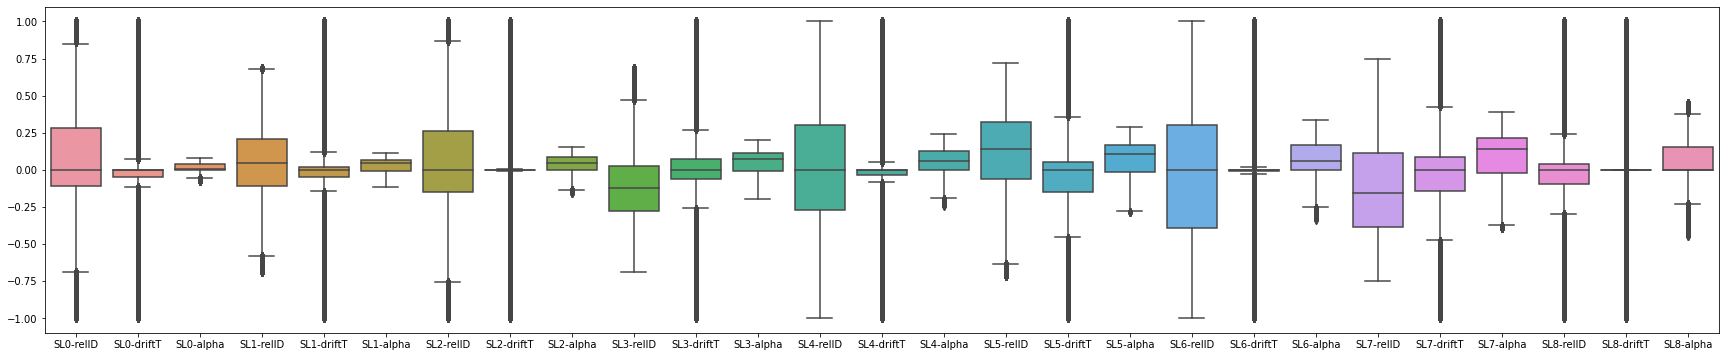

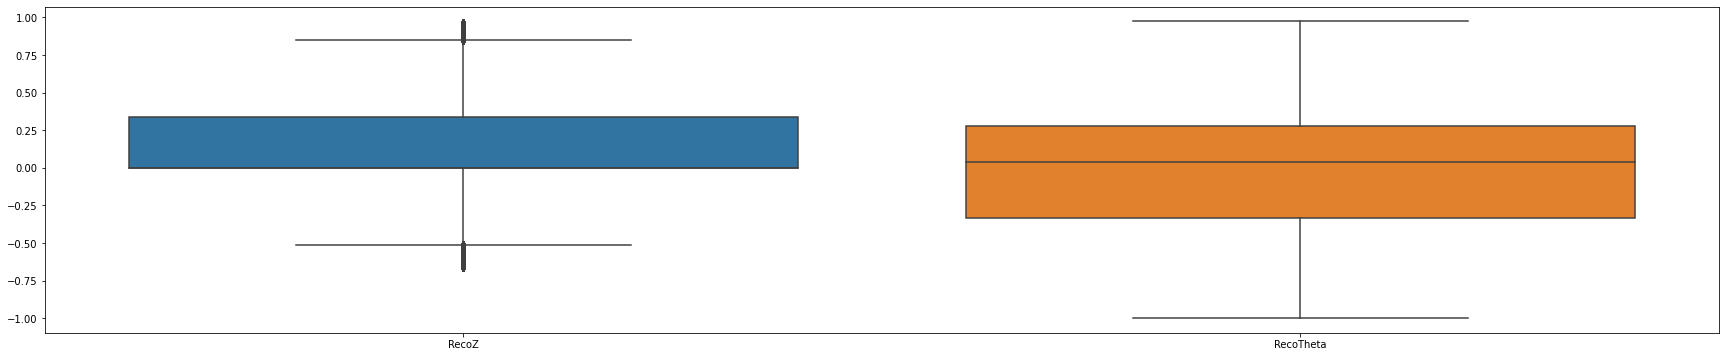

In [8]:
#so we have no nan values, now lets look at the data distribution 
plot_dims = (30, 6)
fig, ax1 = pyplot.subplots(figsize=plot_dims)
fig, ax2 = pyplot.subplots(figsize=plot_dims)
sns.boxplot(data=data_expert0_X, ax=ax1)
sns.boxplot(data=data_expert0_Y, ax=ax2)

We can see that the Data is already prepared. So lets look more into it

Text(0.5, 1.0, 'Correlation Heatmap')

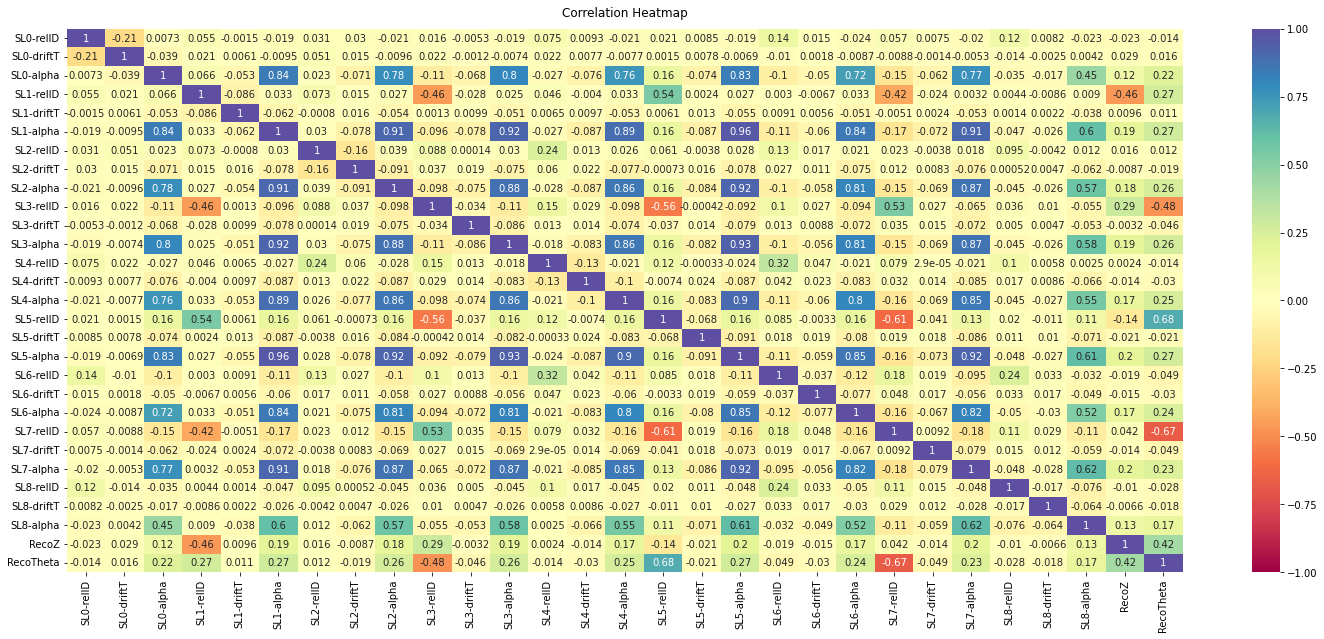

In [9]:
plt.figure(figsize=(25, 10))
variables = inpval+outpval
data_h = data[variables]
heatmap = sns.heatmap(data_h.corr(), vmin=-1, vmax=1, annot=True,cmap="Spectral")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

<function matplotlib.pyplot.show(close=None, block=None)>

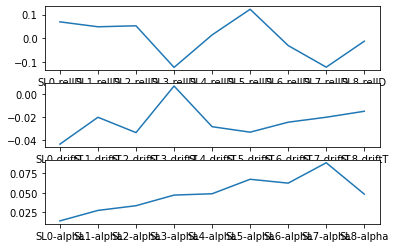

<Figure size 432x288 with 0 Axes>

In [10]:
rellDs=['SL0-relID','SL1-relID','SL2-relID','SL3-relID','SL4-relID','SL5-relID',
        'SL6-relID','SL7-relID','SL8-relID']
rellDsvals=data_expert0[rellDs]
meanrellDsvals=rellDsvals.mean()
driftTs=['SL0-driftT','SL1-driftT','SL2-driftT','SL3-driftT','SL4-driftT','SL5-driftT',
         'SL6-driftT','SL7-driftT','SL8-driftT']
driftTsvals=data_expert0[driftTs]
meandriftTsvals=driftTsvals.mean()
alphas=['SL0-alpha','SL1-alpha','SL2-alpha','SL3-alpha','SL4-alpha','SL5-alpha','SL6-alpha',
        'SL7-alpha','SL8-alpha']
alphasvals=data_expert0[alphas]
meanalphasvals=alphasvals.mean()
figure, axis = plt.subplots(3, 1)
f = plt.figure()
axis[0].plot(meanrellDsvals)
axis[1].plot(meandriftTsvals)
axis[2].plot(meanalphasvals)
plt.show

Wie erwartet werden die Teilchen immer weiter abgelenkt -> der Winkel nimmt im Schnitt zu.

(array([1.4000e+01, 1.2000e+01, 8.0000e+00, 9.0000e+00, 1.7000e+01,
        1.9000e+01, 2.3000e+01, 1.8000e+01, 2.0000e+01, 2.4000e+01,
        3.0000e+01, 2.6000e+01, 2.7000e+01, 2.9000e+01, 3.6000e+01,
        2.5000e+01, 2.7000e+01, 2.9000e+01, 2.6000e+01, 2.3000e+01,
        2.3000e+01, 1.7000e+01, 1.5000e+01, 2.9000e+01, 2.6000e+01,
        2.8000e+01, 2.8000e+01, 3.3000e+01, 3.1000e+01, 2.9000e+01,
        3.0000e+01, 2.3000e+01, 3.0000e+01, 2.1000e+01, 3.1000e+01,
        3.2000e+01, 4.2000e+01, 3.8000e+01, 3.9000e+01, 4.9000e+01,
        4.5000e+01, 4.5000e+01, 6.5000e+01, 5.6000e+01, 5.2000e+01,
        7.7000e+01, 5.6000e+01, 6.6000e+01, 7.3000e+01, 8.0000e+01,
        7.7000e+01, 1.2100e+02, 1.1100e+02, 1.0600e+02, 1.4100e+02,
        1.4400e+02, 1.2800e+02, 1.4600e+02, 1.3600e+02, 1.2200e+02,
        1.5000e+02, 1.3700e+02, 1.7200e+02, 2.0100e+02, 2.1300e+02,
        2.0900e+02, 2.3600e+02, 3.8900e+02, 8.8500e+02, 2.2240e+03,
        1.9240e+03, 1.0770e+03, 7.8200e+02, 7.86

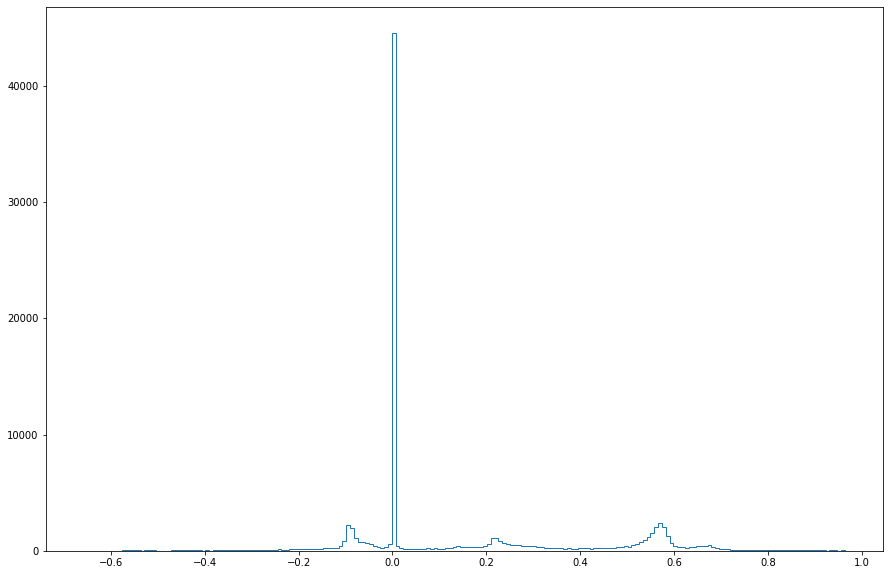

In [11]:
data_expert0_X_short = data_expert0_X.iloc[0:100000]
data_expert0_Y_short = data_expert0_Y.iloc[0:100000]
plot_dims = (15, 10)
plt.figure(figsize=plot_dims)
plt.hist(data_expert0_Y_short['RecoZ'], bins=200,histtype='step')

Benchmark and plot function
Die referenz Werte als Fehlerhistogram

mse_Z
0.03711223588225651
mse_Theta
0.0427288748700711
sigma_Z
0.18942315481374195
sigma_Theta
0.20165440330742926


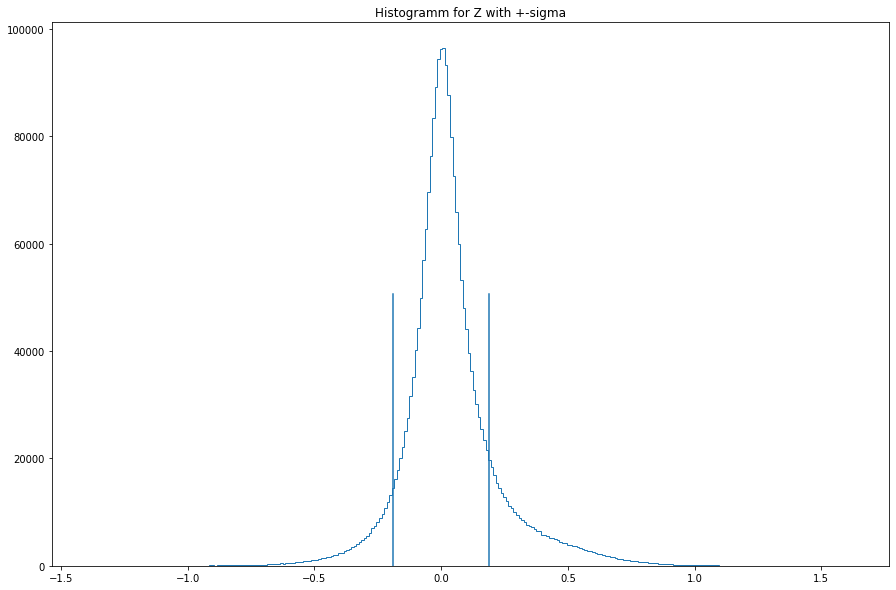

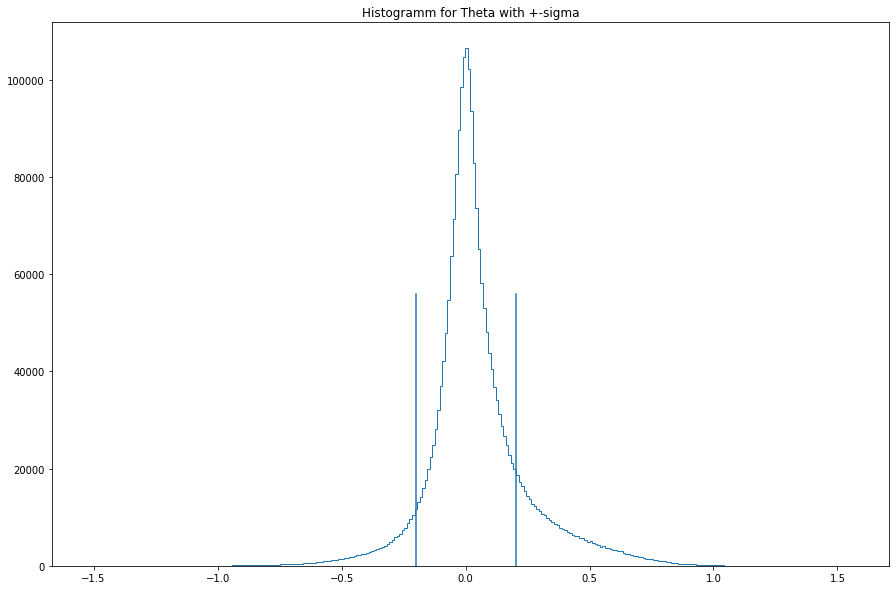

In [12]:
def plot_as_hist(df_pred_Z: pd.DataFrame, df_pred_Theta:pd.DataFrame,df_real_Z: pd.DataFrame, df_real_Theta: pd.DataFrame):
    
    mseZ=mean_squared_error(df_real_Z, df_pred_Z)
    mseTheta=mean_squared_error(df_real_Theta, df_pred_Theta)
    print('mse_Z')
    print(mseZ)
    print('mse_Theta')
    print(mseTheta)

    error_Z=df_real_Z-df_pred_Z
    error_Theta=df_real_Theta-df_pred_Theta

    sigma_Z=error_Z.std()
    sigma_Theta=error_Theta.std()
    print('sigma_Z')
    print(sigma_Z)
    print('sigma_Theta')
    print(sigma_Theta)
    plot_dims = (15, 10)
    plt.figure(figsize=plot_dims)
    
    plt.axvline(x=-sigma_Z,ymin=0, ymax=0.5)
    plt.axvline(x=sigma_Z,ymin=0, ymax=0.5)
    plt.hist(error_Z, bins=300,histtype='step')
    plt.savefig('sigma_Z.png')
    plt.title('Histogramm for Z with +-sigma')
    plt.show()
    
    plt.figure(figsize=plot_dims)
    plt.axvline(x=-sigma_Theta,ymin=0, ymax=0.5)
    plt.axvline(x=sigma_Theta,ymin=0, ymax=0.5)
    plt.hist(error_Theta, bins=300,histtype='step')
    plt.savefig('sigma_Theta.png')
    plt.title('Histogramm for Theta with +-sigma')

    

plot_as_hist(data_expert0['ScaleZ'],data_expert0['ScaleTheta'],data_expert0['RecoZ'],data_expert0['RecoTheta'])

# Start with Modelling

Searching for the best parameters

In [13]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor

Training mit den besten params 

In [14]:
from keras.utils.vis_utils import plot_model

In [15]:
from sklearn.model_selection import train_test_split
data_expert0_X_train, data_expert0_X_test, data_expert0_Y_train, data_expert0_Y_test = train_test_split(data_expert0_X, data_expert0_Y, test_size=0.2)

In [16]:
def create_model1():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(81, input_dim=27,activation='tanh'))
    model.add(tf.keras.layers.Dense(2, activation='tanh'))
    return model

model1=create_model1()
model1.summary()
model1.compile(optimizer ='adam',loss='mse', metrics='mse')

plot_model(model1, to_file='model1.png', show_shapes=True, show_layer_names=True)

model1.fit(data_expert0_X_train,data_expert0_Y_train,epochs=30, batch_size=64, validation_split=0.15) 


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 81)                2268      
                                                                 
 dense_1 (Dense)             (None, 2)                 164       
                                                                 
Total params: 2,432
Trainable params: 2,432
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
25742/25742 [==============================] - 89s 3ms/step - loss: 0.0325 - mse: 0.0325 - val_loss: 0.0272 - val_mse: 0.0272
Epoch 2/30
25742/25742 [==============================] - 88s 3ms/step - loss: 0.0256 - mse: 0.0256 - val_loss: 0.0246 - val_mse: 0.0246
Epoch 3/30
25742/25742 [==============================] - 87s 3ms/step - loss: 0.0240 - mse: 0.0240 - val_loss: 0.0242 - val_mse: 0.0242
Epoch 4/30
25742/25742 [===============

mse_Z
0.020353952296806106
mse_Theta
0.021555771701034024
sigma_Z
0.14247914924475072
sigma_Theta
0.14599022955901156


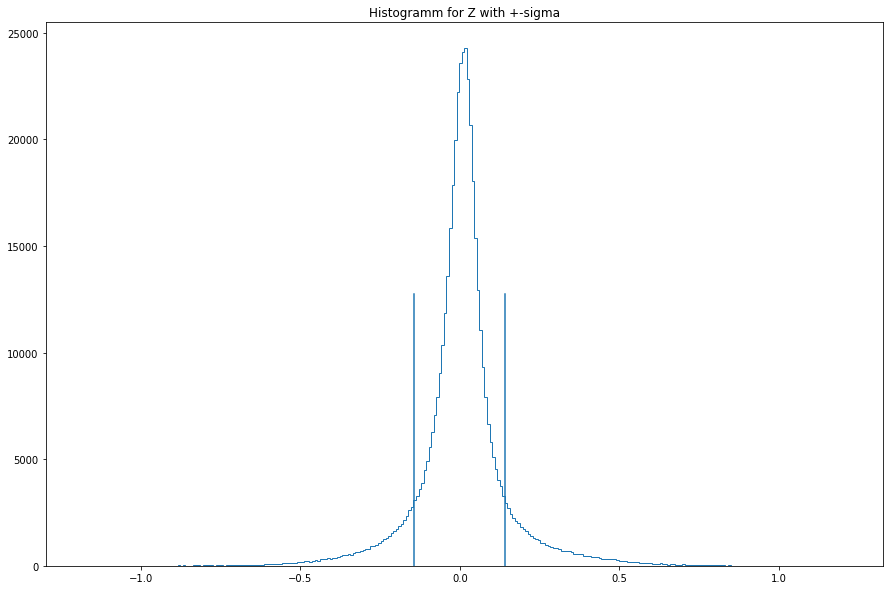

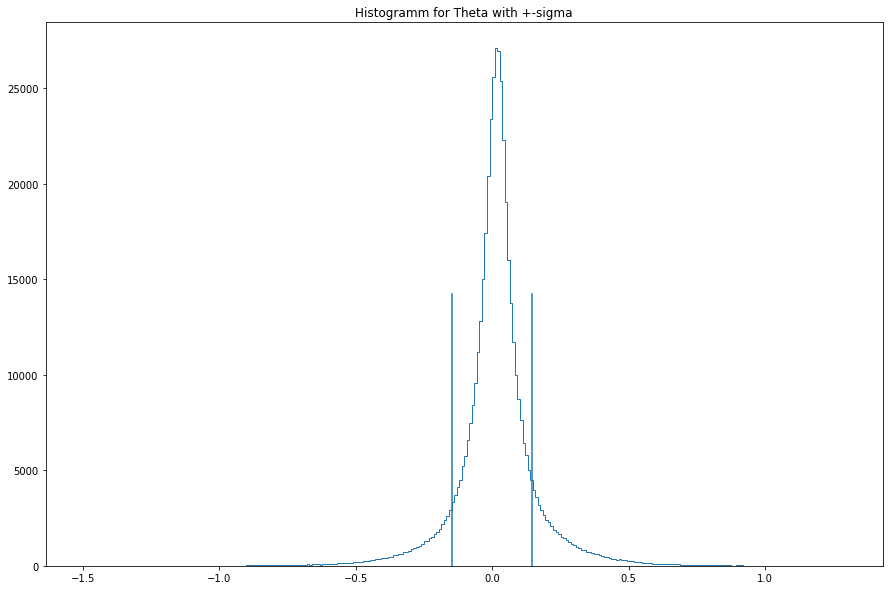

In [17]:
Y_predicted_1 = model1.predict(data_expert0_X_test)

plot_as_hist(Y_predicted_1[:,0],Y_predicted_1[:,1],data_expert0_Y_test['RecoZ'],data_expert0_Y_test['RecoTheta'])

Mit anpassbare learningrate

In [18]:
def scheduler (epoch,lr) : 
    if epoch < 10 :
        return lr
    else : 
        return lr*tf.math.exp(-0.1)
    
scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [19]:
def create_model2():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(81, input_dim=27,activation='tanh'))
    model.add(tf.keras.layers.Dense(2, activation='tanh'))
    return model

model2=create_model2()
model2.summary()
model2.compile(optimizer ='adam',loss='mse', metrics='mse')
plot_model(model2, to_file='model2.png', show_shapes=True, show_layer_names=True)
model2.fit(data_expert0_X_train,data_expert0_Y_train,epochs=30, batch_size=64, validation_split=0.15, callbacks=scheduler)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 81)                2268      
                                                                 
 dense_3 (Dense)             (None, 2)                 164       
                                                                 
Total params: 2,432
Trainable params: 2,432
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
25742/25742 [==============================] - 87s 3ms/step - loss: 0.0325 - mse: 0.0325 - val_loss: 0.0267 - val_mse: 0.0267 - lr: 0.0010
Epoch 2/30
25742/25742 [==============================] - 87s 3ms/step - loss: 0.0252 - mse: 0.0252 - val_loss: 0.0245 - val_mse: 0.0245 - lr: 0.0010
Epoch 3/30
25742/25742 [==============================] - 88s 3ms/step - loss: 0.0241 - mse: 0.0241 - val_loss: 0.0242 - val_mse: 0.0242 - lr: 0.001

mse_Z
0.020415907482679414
mse_Theta
0.021353792348195524
sigma_Z
0.1427653869363303
sigma_Theta
0.14603639069402305


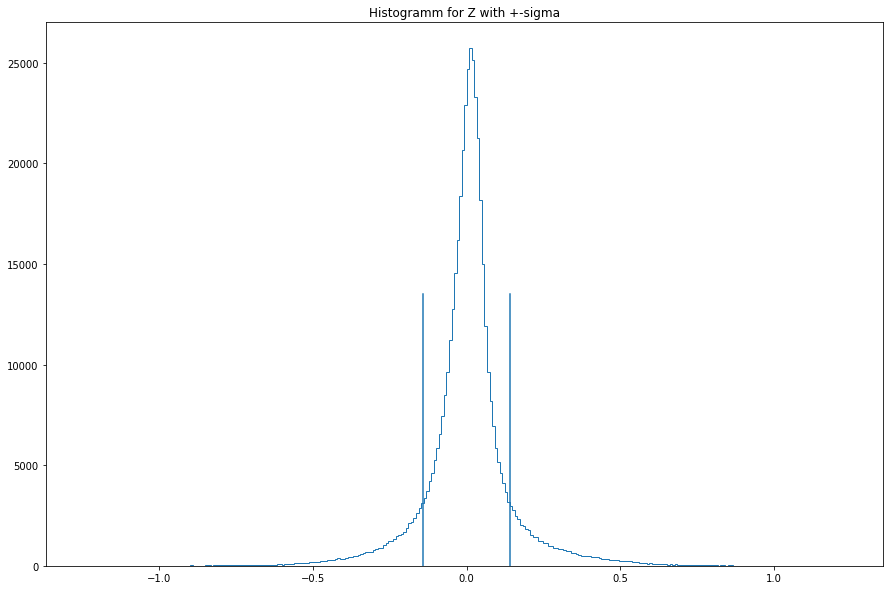

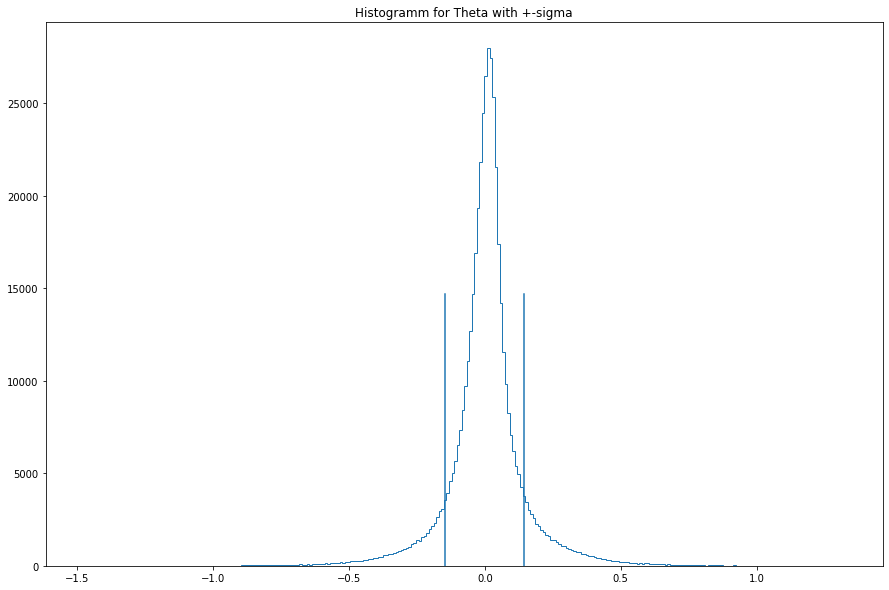

In [20]:
Y_predicted_2 = model2.predict(data_expert0_X_test)
plot_as_hist(Y_predicted_2[:,0],Y_predicted_2[:,1],data_expert0_Y_test['RecoZ'],data_expert0_Y_test['RecoTheta'])
#plt.show

# Pruning

Entweder mit tfmot.sparsity.keras.prune_low_magnitude Werte zu Null setzen lassen und dann um den Faktor geringeres Netz wählen oder Manuell mit model.layers die Gewicht ausgeben lassen und dann nach einem Ermessen Werte kleiner einer bestimmten Magnitude rauswerfen. Die Modelle in eine Funktion zu packen hat bei uns zu komischen Memory errors geführt deshalb die etwas längere Darstellung :)

In [21]:
from tensorflow_model_optimization.sparsity.keras import ConstantSparsity
from tensorflow_model_optimization.sparsity.keras import prune_low_magnitude
from tensorflow_model_optimization.sparsity.keras import strip_pruning

pruning_params = {
    'pruning_schedule': ConstantSparsity(0.3, 0),
    'block_size': (1, 1),
    'block_pooling_type': 'AVG'
}

In [22]:
def create_model_p(): 

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(200, input_dim=27,activation='tanh'))
    model.add(tf.keras.layers.Dense(200,activation='tanh'))
    model.add(tf.keras.layers.Dense(2, activation='tanh'))
    
    return model

In [23]:
model2=create_model_p()
model_to_prune = tfmot.sparsity.keras.prune_low_magnitude(
    model2, **pruning_params)
model_to_prune.summary()
plot_model(model_to_prune, to_file='model_to_prune.png', show_shapes=True, show_layer_names=True)
model_to_prune.compile(optimizer='adam',
 loss=tf.keras.losses.mean_squared_error,
 metrics=['mse'])

log_dir = '.models'
callbacks = [
 tfmot.sparsity.keras.UpdatePruningStep(),
 # Log sparsity and other metrics in Tensorboard.
 tfmot.sparsity.keras.PruningSummaries(log_dir=log_dir),
 keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
]
hist_model_to_prune=model_to_prune.fit(data_expert0_X_train,data_expert0_Y_train,epochs=30,validation_split=0.2,callbacks=[callbacks,scheduler],batch_size=64)

C:\tools\Anaconda3\envs\lama-task-8\lib\site-packages\tensorflow_model_optimization\python\core\sparsity\keras\pruning_wrapper.py:212: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  mask = self.add_variable(
C:\tools\Anaconda3\envs\lama-task-8\lib\site-packages\tensorflow_model_optimization\python\core\sparsity\keras\pruning_wrapper.py:219: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  threshold = self.add_variable(
C:\tools\Anaconda3\envs\lama-task-8\lib\site-packages\tensorflow_model_optimization\python\core\sparsity\keras\pruning_wrapper.py:233: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  self.pruning_step = self.add_variable(


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 prune_low_magnitude_dense_4  (None, 200)              11002     
  (PruneLowMagnitude)                                            
                                                                 
 prune_low_magnitude_dense_5  (None, 200)              80202     
  (PruneLowMagnitude)                                            
                                                                 
 prune_low_magnitude_dense_6  (None, 2)                804       
  (PruneLowMagnitude)                                            
                                                                 
Total params: 92,008
Trainable params: 46,202
Non-trainable params: 45,806
_________________________________________________________________
Epoch 1/30
24228/24228 [==============================] - 167s 7ms/step - loss: 0.0255 - mse: 0.0255 - val_loss

mse_Z
0.017909152602929954
mse_Theta
0.019096712828032696
sigma_Z
0.1337688295503193
sigma_Theta
0.13817484673309666


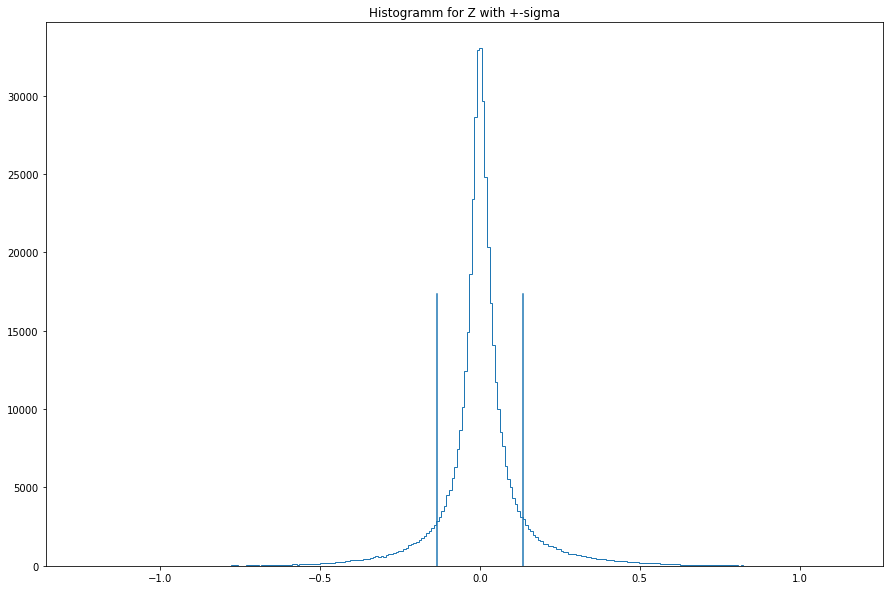

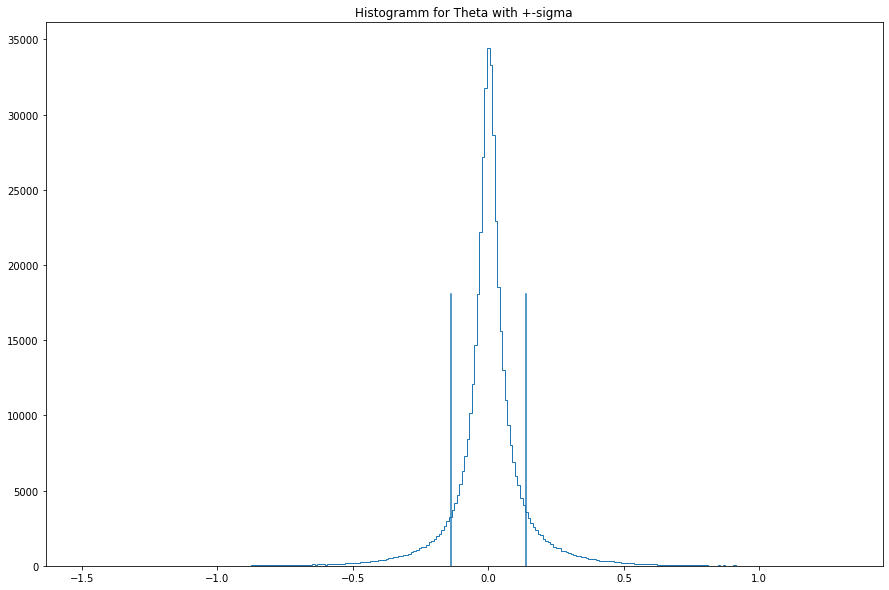

In [24]:
Y_predicted_p1 = model_to_prune.predict(data_expert0_X_test)

plot_as_hist(Y_predicted_p1[:,0],Y_predicted_p1[:,1],data_expert0_Y_test['RecoZ'],data_expert0_Y_test['RecoTheta'])

In [25]:
mod2_first_layer_weights = model_to_prune.layers[0].get_weights()[0]
mod2_first_layer_biases = model_to_prune.layers[0].get_weights()[1]
mod2_second_layer_weights = model_to_prune.layers[1].get_weights()[0]
mod2_second_layer_biases = model_to_prune.layers[1].get_weights()[1]

#print(mod2_first_layer_weights)
#print(mod2_first_layer_biases)
#print(mod2_second_layer_weights)
#print(mod2_second_layer_biases)#
#print((mod2_first_layer_weights[1]))

n_zerosmod2_first_layer_weights = np.count_nonzero(mod2_first_layer_weights==0)
print(n_zerosmod2_first_layer_weights)
layer_1_factor=n_zerosmod2_first_layer_weights/(model_to_prune.layers[0].count_params())
print(layer_1_factor)

n_zerosmod2_second_layer_weights = np.count_nonzero(mod2_second_layer_weights==0)
print(n_zerosmod2_second_layer_weights)
layer_2_factor=n_zerosmod2_second_layer_weights/(model_to_prune.layers[1].count_params())
print(layer_2_factor)

1620
0.14724595528085802
12000
0.14962220393506395


ca 14 prozent der weights sind 0 -> wir reduzieren die anzahl an neuronen um den Faktor 

In [26]:
def create_model_p2(): 

    # compile the keras model
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(int(200*(1-layer_1_factor)), input_dim=27, activation='tanh'))
    model.add(tf.keras.layers.Dense(int(200*(1-layer_2_factor)), activation='tanh'))
    model.add(tf.keras.layers.Dense(2, activation='tanh'))
    return model 

In [27]:
model3=create_model_p2()
model_to_prune2 = tfmot.sparsity.keras.prune_low_magnitude(
    model3, **pruning_params)

C:\tools\Anaconda3\envs\lama-task-8\lib\site-packages\tensorflow_model_optimization\python\core\sparsity\keras\pruning_wrapper.py:212: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  mask = self.add_variable(
C:\tools\Anaconda3\envs\lama-task-8\lib\site-packages\tensorflow_model_optimization\python\core\sparsity\keras\pruning_wrapper.py:219: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  threshold = self.add_variable(
C:\tools\Anaconda3\envs\lama-task-8\lib\site-packages\tensorflow_model_optimization\python\core\sparsity\keras\pruning_wrapper.py:233: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  self.pruning_step = self.add_variable(


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 prune_low_magnitude_dense_7  (None, 170)              9352      
  (PruneLowMagnitude)                                            
                                                                 
 prune_low_magnitude_dense_8  (None, 170)              57972     
  (PruneLowMagnitude)                                            
                                                                 
 prune_low_magnitude_dense_9  (None, 2)                684       
  (PruneLowMagnitude)                                            
                                                                 
Total params: 68,008
Trainable params: 34,172
Non-trainable params: 33,836
_________________________________________________________________


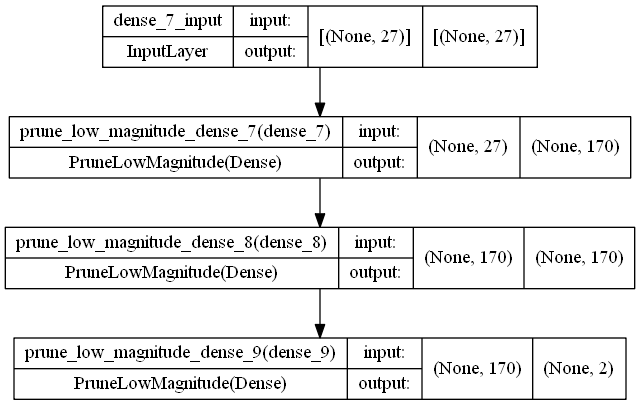

In [28]:
model_to_prune2.summary()
plot_model(model_to_prune2, to_file='model_to_prune2.png', show_shapes=True, show_layer_names=True)

In [29]:
model_to_prune2.compile(optimizer='adam',
 loss=tf.keras.losses.mean_squared_error,
 metrics=['mse'])

log_dir = '.models'
callbacks = [
 tfmot.sparsity.keras.UpdatePruningStep(),
 # Log sparsity and other metrics in Tensorboard.
 tfmot.sparsity.keras.PruningSummaries(log_dir=log_dir),
 keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
]
model_to_prune2.fit(data_expert0_X_train,data_expert0_Y_train,epochs=30,validation_split=0.2,callbacks=callbacks)

Epoch 1/30
48455/48455 [==============================] - 333s 7ms/step - loss: 0.0247 - mse: 0.0247 - val_loss: 0.0222 - val_mse: 0.0222
Epoch 2/30
48455/48455 [==============================] - 332s 7ms/step - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0214 - val_mse: 0.0214
Epoch 3/30
48455/48455 [==============================] - 333s 7ms/step - loss: 0.0211 - mse: 0.0211 - val_loss: 0.0211 - val_mse: 0.0211
Epoch 4/30
48455/48455 [==============================] - 333s 7ms/step - loss: 0.0208 - mse: 0.0208 - val_loss: 0.0209 - val_mse: 0.0209
Epoch 5/30
48455/48455 [==============================] - 331s 7ms/step - loss: 0.0205 - mse: 0.0205 - val_loss: 0.0205 - val_mse: 0.0205
Epoch 6/30
48455/48455 [==============================] - 330s 7ms/step - loss: 0.0203 - mse: 0.0203 - val_loss: 0.0205 - val_mse: 0.0205
Epoch 7/30
48455/48455 [==============================] - 333s 7ms/step - loss: 0.0202 - mse: 0.0202 - val_loss: 0.0201 - val_mse: 0.0201
Epoch 8/30
48455/48455 [==========

mse_Z
0.01825848409402327
mse_Theta
0.019859091069293608
sigma_Z
0.13491147121796393
sigma_Theta
0.14086471924733715


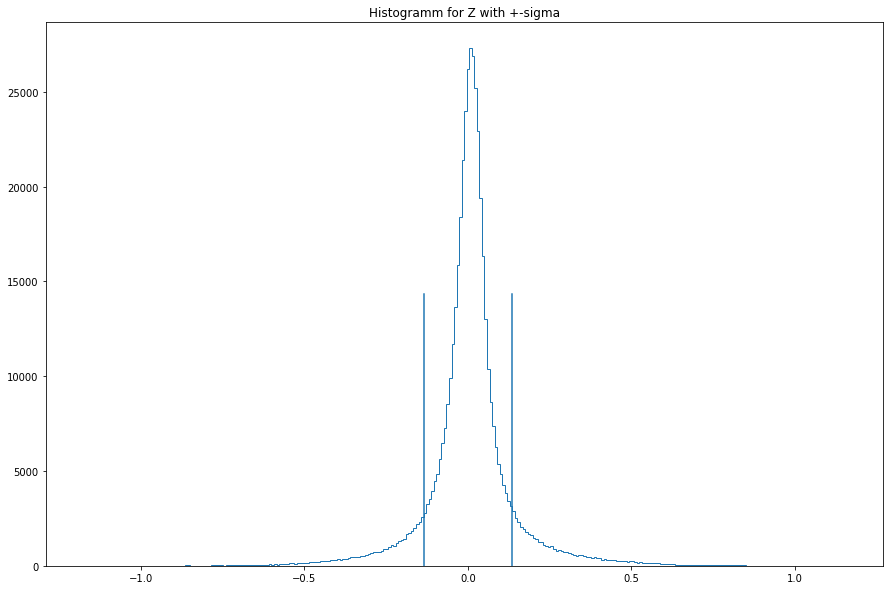

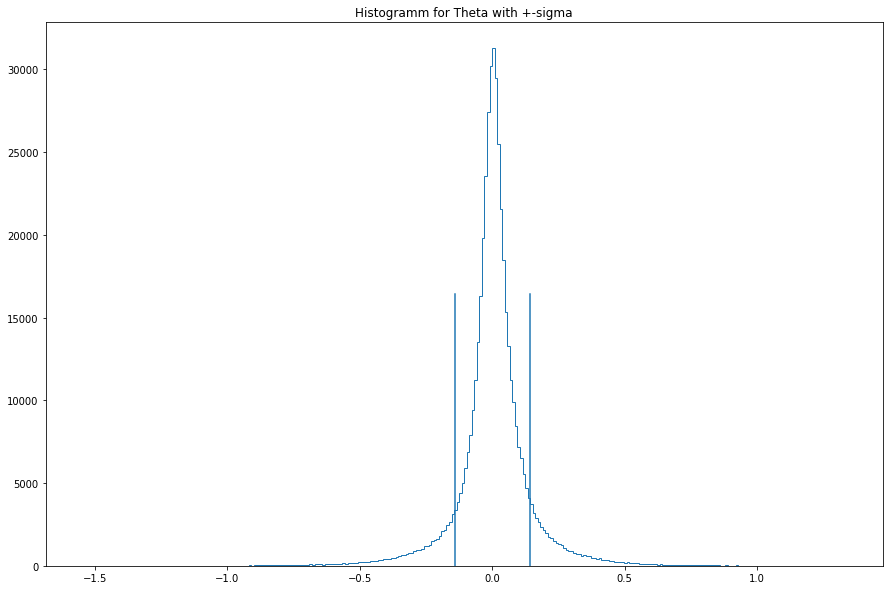

In [30]:
Y_predicted_p2 = model_to_prune2.predict(data_expert0_X_test)

plot_as_hist(Y_predicted_p2[:,0],Y_predicted_p2[:,1],data_expert0_Y_test['RecoZ'],data_expert0_Y_test['RecoTheta'])

In [31]:
mod3_first_layer_weights = model_to_prune2.layers[0].get_weights()[0]
mod3_first_layer_biases = model_to_prune2.layers[0].get_weights()[1]
mod3_second_layer_weights = model_to_prune2.layers[1].get_weights()[0]
mod3_second_layer_biases = model_to_prune2.layers[1].get_weights()[1]

#print(mod2_first_layer_weights)
#print(mod2_first_layer_biases)
#print(mod2_second_layer_weights)
#print(mod2_second_layer_biases)

n_zerosmod3_first_layer_weights = np.count_nonzero(mod3_first_layer_weights==0)
print(n_zerosmod3_first_layer_weights)
layer_1_factor2=n_zerosmod3_first_layer_weights/(model_to_prune2.layers[0].count_params())
print(layer_1_factor2)

n_zerosmod3_second_layer_weights = np.count_nonzero(mod3_second_layer_weights==0)
print(n_zerosmod3_second_layer_weights)
layer_2_factor2=n_zerosmod3_second_layer_weights/(model_to_prune2.layers[1].count_params())
print(layer_2_factor2)

1377
0.14724123182207013
8670
0.14955495756572137


In [32]:
def create_model_p3(): 

    # compile the keras model
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(int(200*(1-layer_1_factor)*(1-layer_1_factor2)), input_dim=27, activation='tanh'))
    model.add(tf.keras.layers.Dense(int(200*(1-layer_2_factor)*(1-layer_2_factor2)), activation='tanh'))
    model.add(tf.keras.layers.Dense(2, activation='tanh'))
    return model 

In [33]:
model4=create_model_p3()
model_to_prune3 = tfmot.sparsity.keras.prune_low_magnitude(
    model4, **pruning_params)
model_to_prune3.summary()
plot_model(model_to_prune3, to_file='model_to_prune3.png', show_shapes=True, show_layer_names=True)
model_to_prune3.compile(optimizer='adam',
 loss=tf.keras.losses.mean_squared_error,
 metrics=['mse'])

log_dir = '.models'
callbacks = [
 tfmot.sparsity.keras.UpdatePruningStep(),
 # Log sparsity and other metrics in Tensorboard.
 tfmot.sparsity.keras.PruningSummaries(log_dir=log_dir),
 keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
]
model_to_prune3.fit(data_expert0_X_train,data_expert0_Y_train,epochs=30,validation_split=0.2,callbacks=callbacks)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 prune_low_magnitude_dense_1  (None, 145)              7977      
 0 (PruneLowMagnitude)                                           
                                                                 
 prune_low_magnitude_dense_1  (None, 144)              41906     
 1 (PruneLowMagnitude)                                           
                                                                 
 prune_low_magnitude_dense_1  (None, 2)                580       
 2 (PruneLowMagnitude)                                           
                                                                 
Total params: 50,463
Trainable params: 25,374
Non-trainable params: 25,089
_________________________________________________________________


C:\tools\Anaconda3\envs\lama-task-8\lib\site-packages\tensorflow_model_optimization\python\core\sparsity\keras\pruning_wrapper.py:212: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  mask = self.add_variable(
C:\tools\Anaconda3\envs\lama-task-8\lib\site-packages\tensorflow_model_optimization\python\core\sparsity\keras\pruning_wrapper.py:219: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  threshold = self.add_variable(
C:\tools\Anaconda3\envs\lama-task-8\lib\site-packages\tensorflow_model_optimization\python\core\sparsity\keras\pruning_wrapper.py:233: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  self.pruning_step = self.add_variable(


Epoch 1/30
48455/48455 [==============================] - 331s 7ms/step - loss: 0.0245 - mse: 0.0245 - val_loss: 0.0221 - val_mse: 0.0221
Epoch 2/30
48455/48455 [==============================] - 332s 7ms/step - loss: 0.0216 - mse: 0.0216 - val_loss: 0.0213 - val_mse: 0.0213
Epoch 3/30
48455/48455 [==============================] - 333s 7ms/step - loss: 0.0210 - mse: 0.0210 - val_loss: 0.0210 - val_mse: 0.0210
Epoch 4/30
48455/48455 [==============================] - 332s 7ms/step - loss: 0.0207 - mse: 0.0207 - val_loss: 0.0208 - val_mse: 0.0208
Epoch 5/30
48455/48455 [==============================] - 333s 7ms/step - loss: 0.0204 - mse: 0.0204 - val_loss: 0.0202 - val_mse: 0.0202
Epoch 6/30
48455/48455 [==============================] - 333s 7ms/step - loss: 0.0202 - mse: 0.0202 - val_loss: 0.0204 - val_mse: 0.0204
Epoch 7/30
48455/48455 [==============================] - 333s 7ms/step - loss: 0.0200 - mse: 0.0200 - val_loss: 0.0200 - val_mse: 0.0200
Epoch 8/30
48455/48455 [==========

mse_Z
0.018688615680685684
mse_Theta
0.020009371201803995
sigma_Z
0.13666747812900815
sigma_Theta
0.14106732415434267


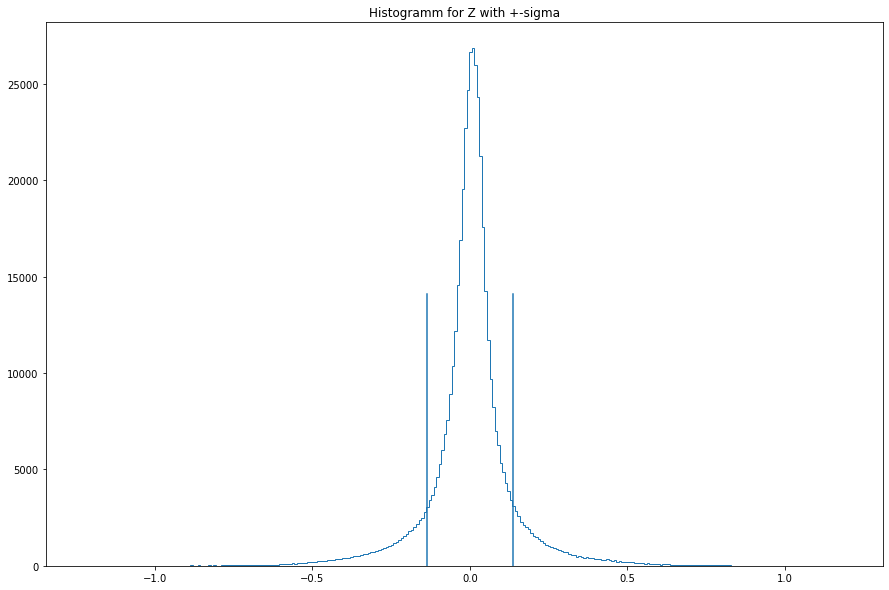

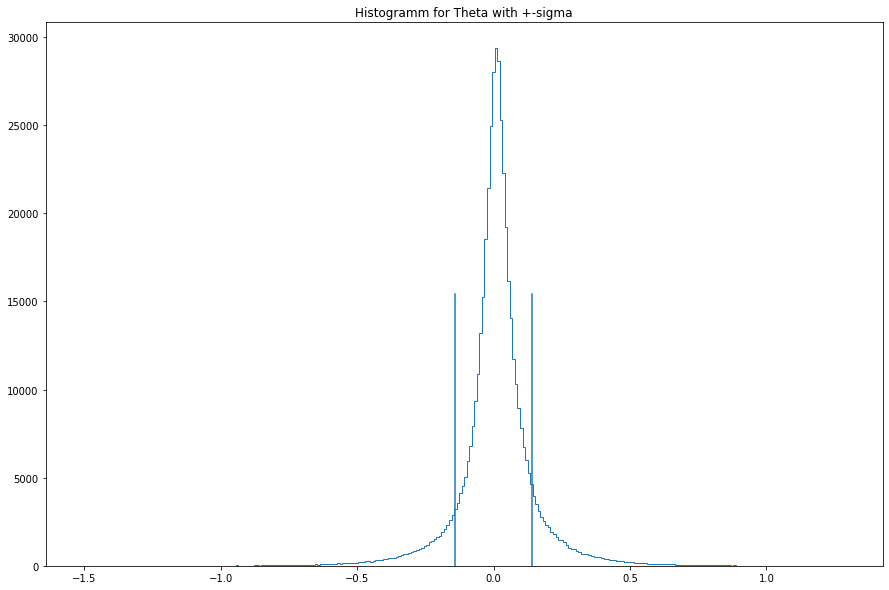

In [34]:
Y_predicted_p3 = model_to_prune3.predict(data_expert0_X_test)

plot_as_hist(Y_predicted_p3[:,0],Y_predicted_p3[:,1],data_expert0_Y_test['RecoZ'],data_expert0_Y_test['RecoTheta'])

In [35]:
mod4_first_layer_weights = model_to_prune3.layers[0].get_weights()[0]
mod4_first_layer_biases = model_to_prune3.layers[0].get_weights()[1]
mod4_second_layer_weights = model_to_prune3.layers[1].get_weights()[0]
mod4_second_layer_biases = model_to_prune3.layers[1].get_weights()[1]



n_zerosmod4_first_layer_weights = np.count_nonzero(mod4_first_layer_weights==0)
print(n_zerosmod4_first_layer_weights)
layer_1_factor3=n_zerosmod4_first_layer_weights/(model_to_prune3.layers[0].count_params())
print(layer_1_factor3)

n_zerosmod4_second_layer_weights = np.count_nonzero(mod4_second_layer_weights==0)
print(n_zerosmod4_second_layer_weights)
layer_2_factor3=n_zerosmod4_second_layer_weights/(model_to_prune3.layers[1].count_params())
print(layer_2_factor3)

1175
0.1472984831390247
6264
0.1494774018040376


In [36]:
def create_model_p4(): 

    # compile the keras model
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(int(200*(1-layer_1_factor)*(1-layer_1_factor2)*(1-layer_1_factor3)), input_dim=27, activation='tanh'))
    model.add(tf.keras.layers.Dense(int(200*(1-layer_2_factor)*(1-layer_2_factor2)*(1-layer_1_factor3)), activation='tanh'))
    model.add(tf.keras.layers.Dense(2, activation='tanh'))
    return model 

In [ ]:
model5=create_model_p4()
model_to_prune4 = tfmot.sparsity.keras.prune_low_magnitude(
    model5, **pruning_params)
model_to_prune4.summary()
plot_model(model_to_prune4, to_file='model_to_prune4.png', show_shapes=True, show_layer_names=True)
model_to_prune4.compile(optimizer='adam',
 loss=tf.keras.losses.mean_squared_error,
 metrics=['mse'])

log_dir = '.models'
callbacks = [
 tfmot.sparsity.keras.UpdatePruningStep(),
 # Log sparsity and other metrics in Tensorboard.
 tfmot.sparsity.keras.PruningSummaries(log_dir=log_dir),
 keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
]
model_to_prune4.fit(data_expert0_X_train,data_expert0_Y_train,epochs=30,validation_split=0.2,callbacks=callbacks)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 prune_low_magnitude_dense_1  (None, 124)              6822      
 6 (PruneLowMagnitude)                                           
                                                                 
 prune_low_magnitude_dense_1  (None, 123)              30629     
 7 (PruneLowMagnitude)                                           
                                                                 
 prune_low_magnitude_dense_1  (None, 2)                496       
 8 (PruneLowMagnitude)                                           
                                                                 
Total params: 37,947
Trainable params: 19,095
Non-trainable params: 18,852
_________________________________________________________________
Epoch 1/30
28879/48455 [================>.............] - ETA: 2:06 - loss: 0.0263 - mse: 0.0263

In [ ]:
Y_predicted_p4 = model_to_prune4.predict(data_expert0_X_test)

plot_as_hist(Y_predicted_p4[:,0],Y_predicted_p4[:,1],data_expert0_Y_test['RecoZ'],data_expert0_Y_test['RecoTheta'])

In [ ]:
#mse plot for the pruning funktions 
mse=[0.02120627185940376,0.021,0.021400247660427432,0.021450934810811787]
x=[0,1,2,3]
plt.plot(x,mse)
plt.title('mse Verlauf Z ')

In [ ]:
mse=[0.09058541154013715,0.09097139070504726,0.0909693731519332,0.13162902937911386]
x=[0,1,2,3]
plt.plot(x,mse)
plt.title('mse Verlauf Theta ')

# Funktionales Model

Uns kam noch die Idee den Datensatz zu teilen um eine bessere Auflösung für die verschiedenen Teile 
zu bekommen. Dazu wollten wir ein Funktionales Model erstellen sind aber nichtmehr dazu gekommen.

In [ ]:
def create_model_f1(): 

    inputs = keras.Input(shape=(27,), name="digits")
    x1 = keras.layers.Dense(81, activation="tanh")(inputs)
    outputs = keras.layers.Dense(2, name="predictions")(x1)
    
    return keras.Model(inputs=inputs, outputs=outputs) 

In [ ]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
model_f1=create_model_f1()
model_f1.summary()
plot_model(model_f1, to_file='model_f1.png', show_shapes=True, show_layer_names=True)
model_f1.compile(optimizer='adam',
 loss=tf.keras.losses.mean_squared_error,
 metrics=['mse'])
hist_model_f1=model_f1.fit(data_expert0_X_train,data_expert0_Y_train,epochs=50,validation_split=0.2,callbacks=early_stop,batch_size=64)

In [ ]:
Y_predicted_f1 = model_f1.predict(data_expert0_X_test)

plot_as_hist(Y_predicted_f1[:,0],Y_predicted_f1[:,1],data_expert0_Y_test['RecoZ'],data_expert0_Y_test['RecoTheta'])

In [ ]:
model_to_prune_f1 = tfmot.sparsity.keras.prune_low_magnitude(
    model_f1, **pruning_params)
model_to_prune_f1.summary()
plot_model(model_to_prune_f1, to_file='model_to_prune_f1.png', show_shapes=True, show_layer_names=True)
model_to_prune_f1.compile(optimizer='adam',
 loss=tf.keras.losses.mean_squared_error,
 metrics=['mse'])

log_dir = '.models'
callbacks = [
 tfmot.sparsity.keras.UpdatePruningStep(),
 # Log sparsity and other metrics in Tensorboard.
 tfmot.sparsity.keras.PruningSummaries(log_dir=log_dir),
 keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
]
model_to_prune_f1.fit(data_expert0_X_train,data_expert0_Y_train,epochs=30,validation_split=0.2,callbacks=callbacks)

In [ ]:
Y_predicted_pf1 = model_to_prune_f1.predict(data_expert0_X_test)

plot_as_hist(Y_predicted_pf1[:,0],Y_predicted_pf1[:,1],data_expert0_Y_test['RecoZ'],data_expert0_Y_test['RecoTheta'])

In [ ]:
# mod5_first_layer_weights = model_to_prune_f1.layers[0].get_weights()[0]
# #mod5_first_layer_biases = model_to_prune_f1.layers[0].get_weights()[1]
# #mod5_second_layer_weights = model_to_prune_f1.layers[1].get_weights()[0]
# #mod5_second_layer_biases = model_to_prune_f1.layers[1].get_weights()[1]



# # n_zerosmod5_first_layer_weights = np.count_nonzero(mod5_first_layer_weights==0)
# # print(n_zerosmod5_first_layer_weights)
# # layer_1_factor4=n_zerosmod5_first_layer_weights/(model_to_prune4.layers[0].count_params())
# # print(layer_1_factor4)

# # n_zerosmod5_second_layer_weights = np.count_nonzero(mod5_second_layer_weights==0)
# # print(n_zerosmod5_second_layer_weights)
# # layer_2_factor4=n_zerosmod5_second_layer_weights/(model_to_prune4.layers[1].count_params())
# # print(layer_2_factor4)